In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Sukamal/NLP 9-11/review.csv")

In [4]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [5]:
positive_review = ' '.join(df[df["sentiment"] == 1]["review"])
negative_review = ' '.join(df[df["sentiment"] == 0]["review"])

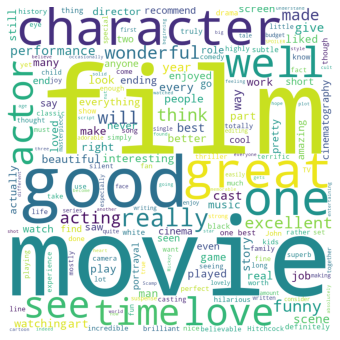

In [6]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(positive_review)

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

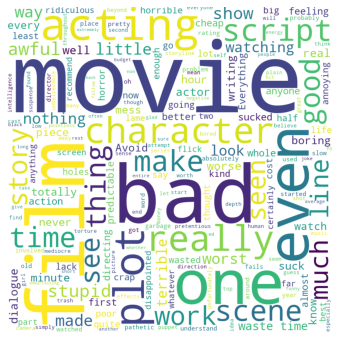

In [7]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(negative_review)

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [8]:
## Remove emoji
'''
import re

def demojify(text):
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
                           "]+", flags = re.UNICODE)
    return regex_pattern.sub(r'',text)


df["review"] = df["review"].apply(demojify)
'''

In [14]:
## emoji to text

# ! pip install emoji

# import emoji

#df["review"] = df["review"].apply(emoji.demojize)

In [12]:
# Feature and Target

X = df["review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [15]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [17]:
# vocabulary
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'is',
 6: 'this',
 7: 'it',
 8: 'i',
 9: 'to',
 10: 'in',
 11: 'was',
 12: 'movie',
 13: 'film',
 14: 'that',
 15: 'for',
 16: 'with',
 17: 'as',
 18: 'but',
 19: 'are',
 20: 'on',
 21: 'not',
 22: "it's",
 23: 'just',
 24: 'one',
 25: 'you',
 26: 'bad',
 27: 'an',
 28: 'all',
 29: 'so',
 30: 'about',
 31: 'at',
 32: 'very',
 33: 'there',
 34: 'like',
 35: 'good',
 36: 'by',
 37: 'from',
 38: 'have',
 39: 'time',
 40: 'he',
 41: 'out',
 42: 'even',
 43: 'acting',
 44: 'has',
 45: 'his',
 46: 'be',
 47: 'were',
 48: 'well',
 49: 'if',
 50: 'great',
 51: 'who',
 52: 'characters',
 53: 'how',
 54: 'more',
 55: 'my',
 56: 'or',
 57: 'really',
 58: 'see',
 59: 'when',
 60: 'some',
 61: 'than',
 62: 'no',
 63: 'best',
 64: 'plot',
 65: 'made',
 66: 'story',
 67: 'movies',
 68: 'character',
 69: "didn't",
 70: 'most',
 71: 'scenes',
 72: 'wonderful',
 73: 'its',
 74: 'better',
 75: "don't",
 76: '10',
 77: 'me',
 78: 'ever',
 79: 'they',
 80: 'what

In [18]:
vocab_len = len(tokenizer.index_word)
vocab_len

2486

In [19]:
# text to sequence
train_sequence = tokenizer.texts_to_sequences(X_train)

In [23]:
doc_len = []

for doc in train_sequence:
  doc_len.append(len(doc))


In [24]:
max(doc_len)

69

In [27]:
np.quantile(doc_len, 0.99)

45.0

In [29]:
max_length = 45

In [31]:
# padding
train_matrix = sequence.pad_sequences(train_sequence,max_length)

In [32]:
train_matrix

array([[  0,   0,   0, ..., 915, 532, 102],
       [  0,   0,   0, ...,   3, 377,  12],
       [  0,   0,   0, ...,   5, 378, 916],
       ...,
       [  0,   0,   0, ...,   3,  85,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 454, 840]], dtype=int32)

In [33]:
# test data

test_sequence = tokenizer.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,max_length)
test_matrix

array([[  0,   0,   0, ...,   3, 388, 111],
       [  0,   0,   0, ...,   9, 101,  77],
       [  0,   0,   0, ...,  42,  35,  15],
       ...,
       [  0,   0,   0, ...,   3,  35, 222],
       [  0,   0,   0, ...,  22,  23, 551],
       [  0,   0,   0, ...,  12,   5, 128]], dtype=int32)

In [40]:
model = Sequential()
model.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [41]:
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 1s 6ms/step - loss: 0.6944
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6706
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 0.5806
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3159
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0785
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0393
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0128
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 9/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 10/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0018


In [42]:
y_pred = model.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       151
           1       0.66      0.67      0.67       149

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300

